In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from collections import Counter


In [399]:
train_visual = pd.read_csv('Data/yds_train2018.csv')
test_visual = pd.read_csv('Data/yds_test2018.csv')

In [400]:
train_visual.shape,test_visual.shape

((79072, 8), (105, 6))

In [401]:
train_visual.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [402]:
test_visual.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [403]:
train_visual = train_visual.groupby(['Year','Month','Product_ID','Country'],as_index=False).agg({'Sales':'sum'})

In [404]:
from numba import jit
import math

@jit
def smape_fast(y_true=None, y_pred=None):
    out = 0
    for i in range(y_true.shape[0]):
        a = y_true[i]
        b = math.fabs(y_pred[i])
        c = a+b
        if c == 0:
            continue
        out += math.fabs(a - b) / c
    out *= (100.0 / y_true.shape[0])
    return out

def smape(pred,dtrain):
    label = np.array(dtrain.get_label())
    return 'smape',smape_fast(label,pred)
    

<h1>fbprophet</h1>

In [405]:
import statsmodels.api as sm

In [406]:
test_visual['Sales'] = 0

train_visual['Year'] = train_visual['Year'].apply(lambda x : str(x))
train_visual['Month'] = train_visual['Month'].apply(lambda x : str(x))

test_visual['Year'] = test_visual['Year'].apply(lambda x : str(x))
test_visual['Month'] = test_visual['Month'].apply(lambda x : str(x))

train_visual['date'] = pd.to_datetime(train_visual['Year']+'-'+train_visual['Month']+'-'+str(1))
test_visual['date'] = pd.to_datetime(test_visual['Year']+'-'+test_visual['Month']+'-'+str(1))

train_visual.rename(columns={'Sales':'y','date':'ds'},inplace=True)
test_visual.rename(columns={'Sales':'y','date':'ds'},inplace=True)

In [407]:
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [408]:
sub = pd.read_csv('Data/yds_test2018.csv')

In [409]:
sub.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [410]:
test_visual.head()

,S_No,Year,Month,Product_ID,Country,y,ds
0,79073,2016,4,1,Argentina,0,2016-04-01
1,79074,2016,5,1,Argentina,0,2016-05-01
2,79075,2016,6,1,Argentina,0,2016-06-01
3,79076,2016,7,1,Argentina,0,2016-07-01
4,79077,2016,8,1,Argentina,0,2016-08-01


In [411]:
result = pd.DataFrame()
# train_visual['cap'] = 0.8
# test_visual['cap'] = 0.8

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  1    Country :  Argentina


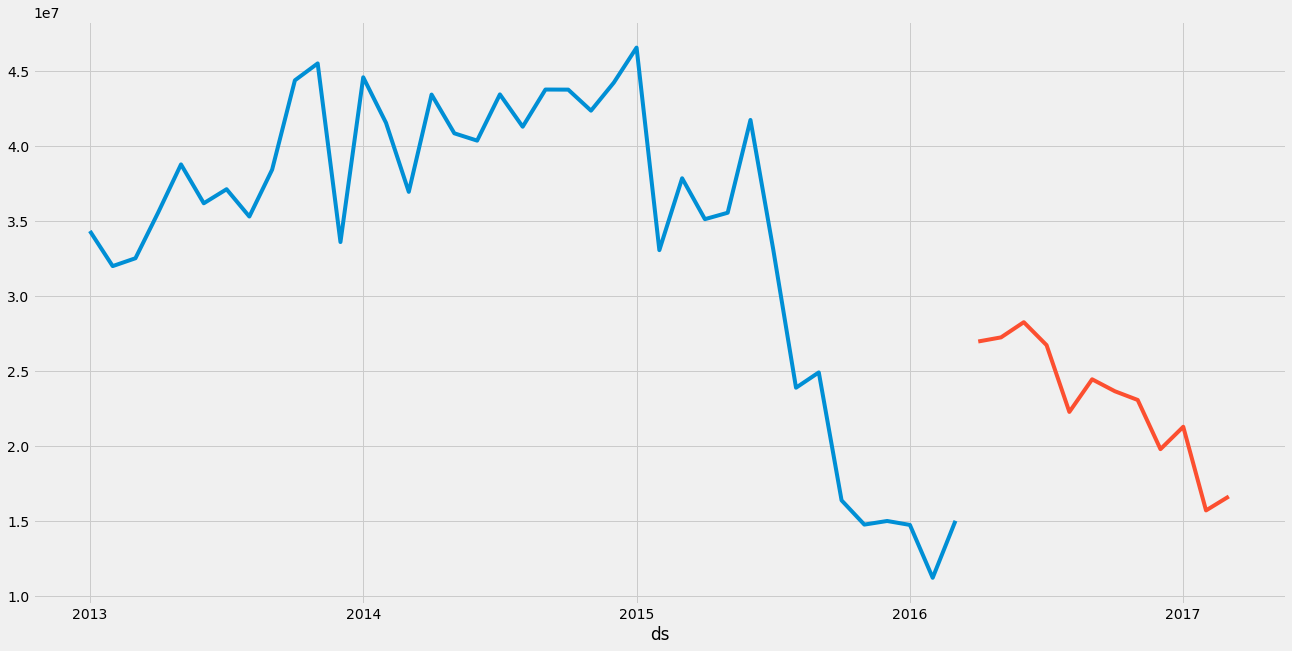

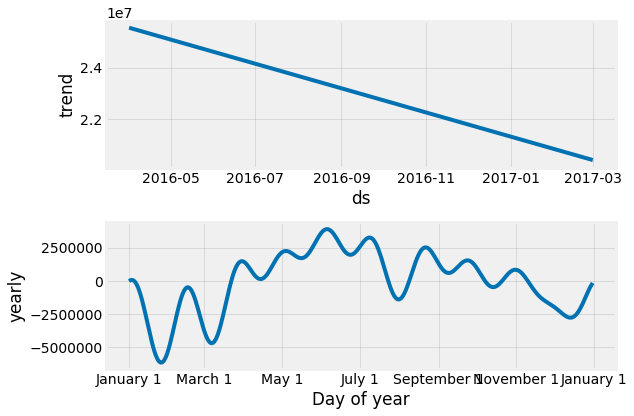

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  1    Country :  Columbia


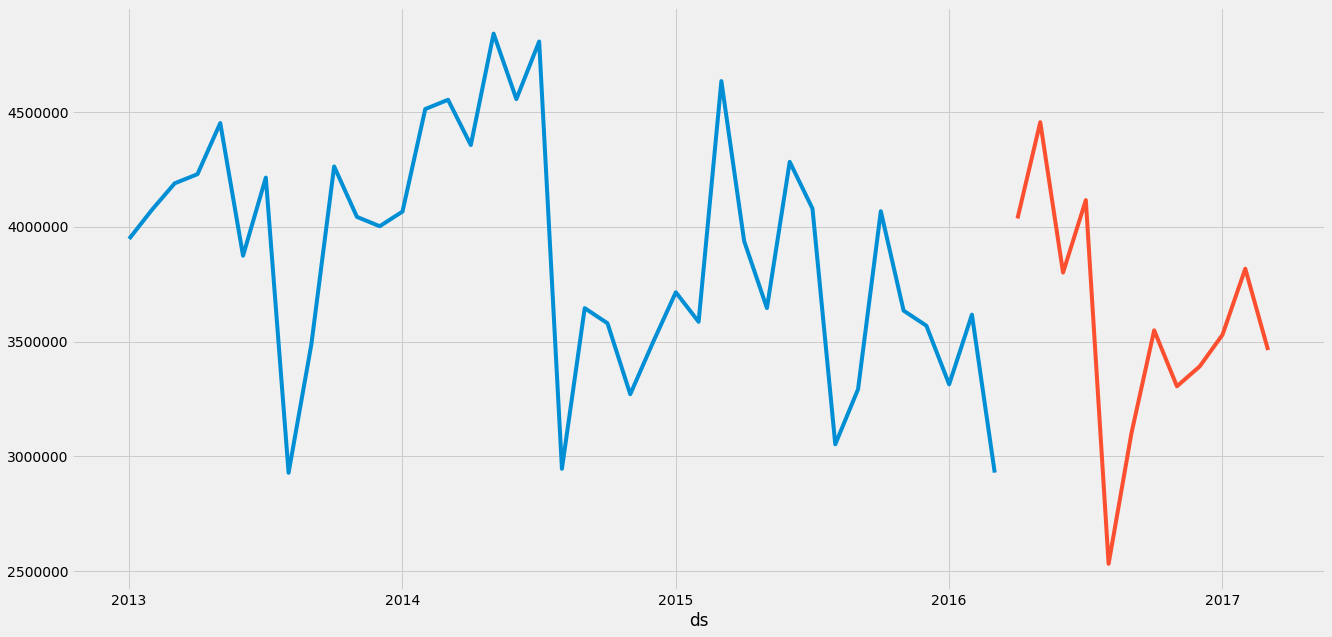

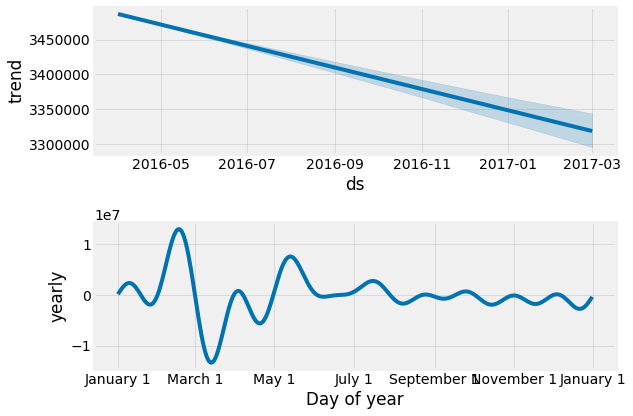

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  2    Country :  Argentina


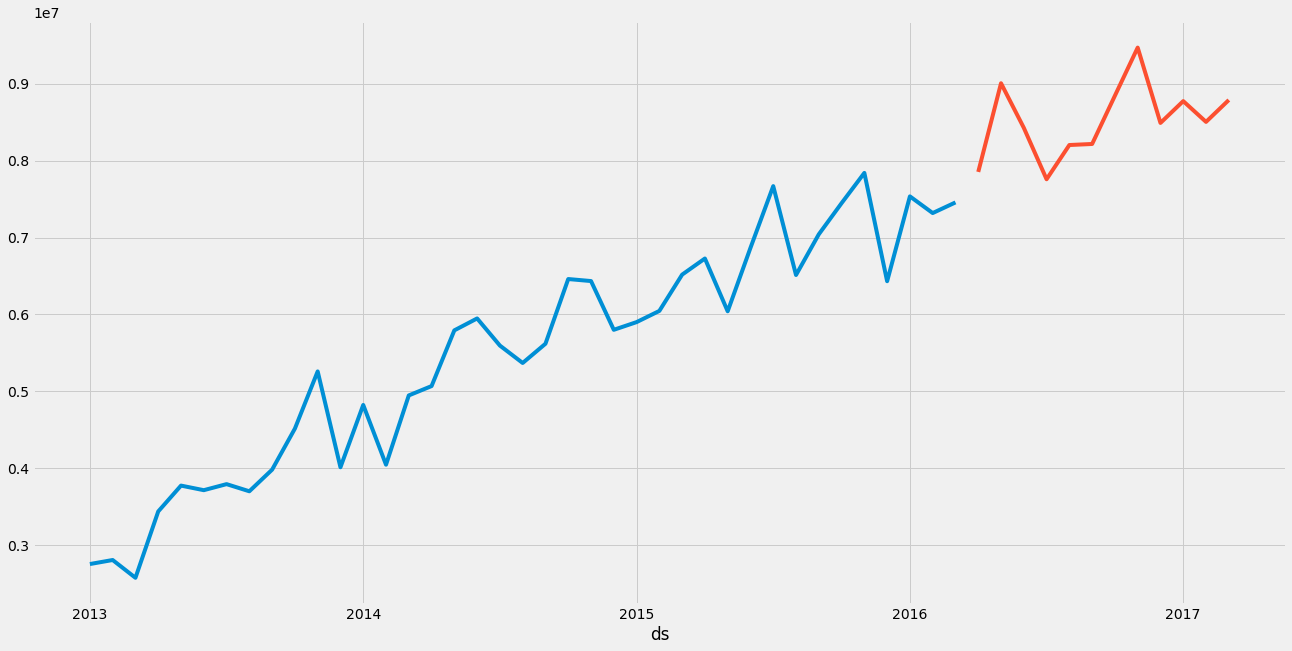

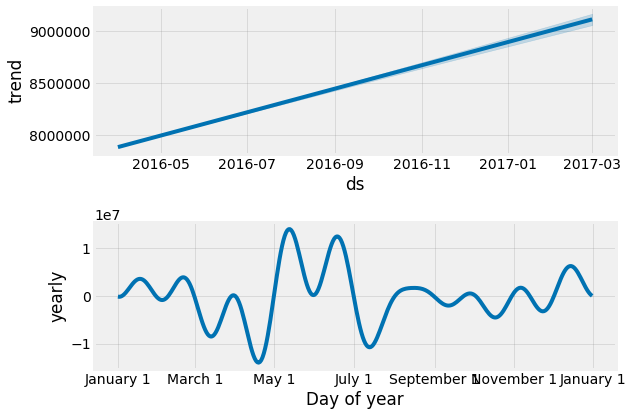

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  2    Country :  Belgium


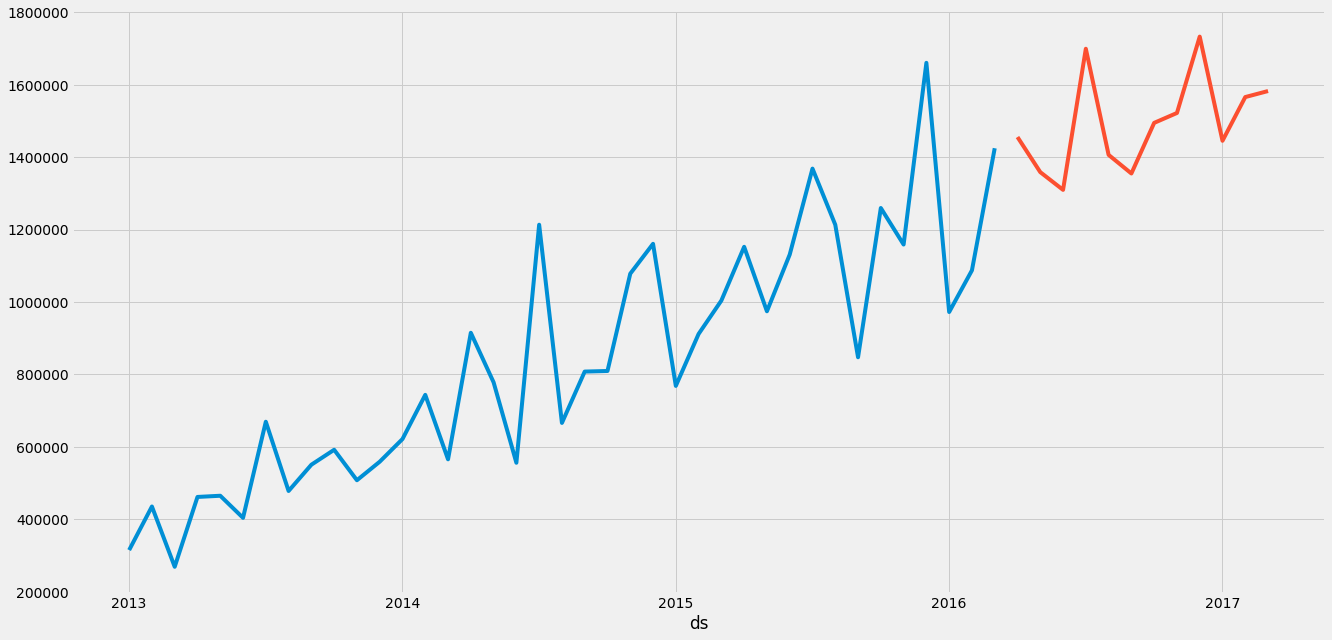

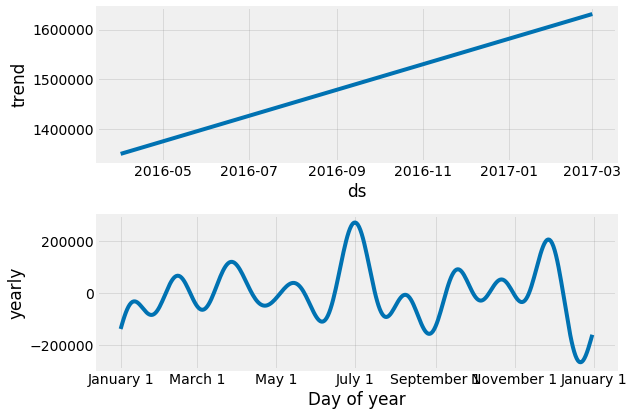

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  2    Country :  Denmark


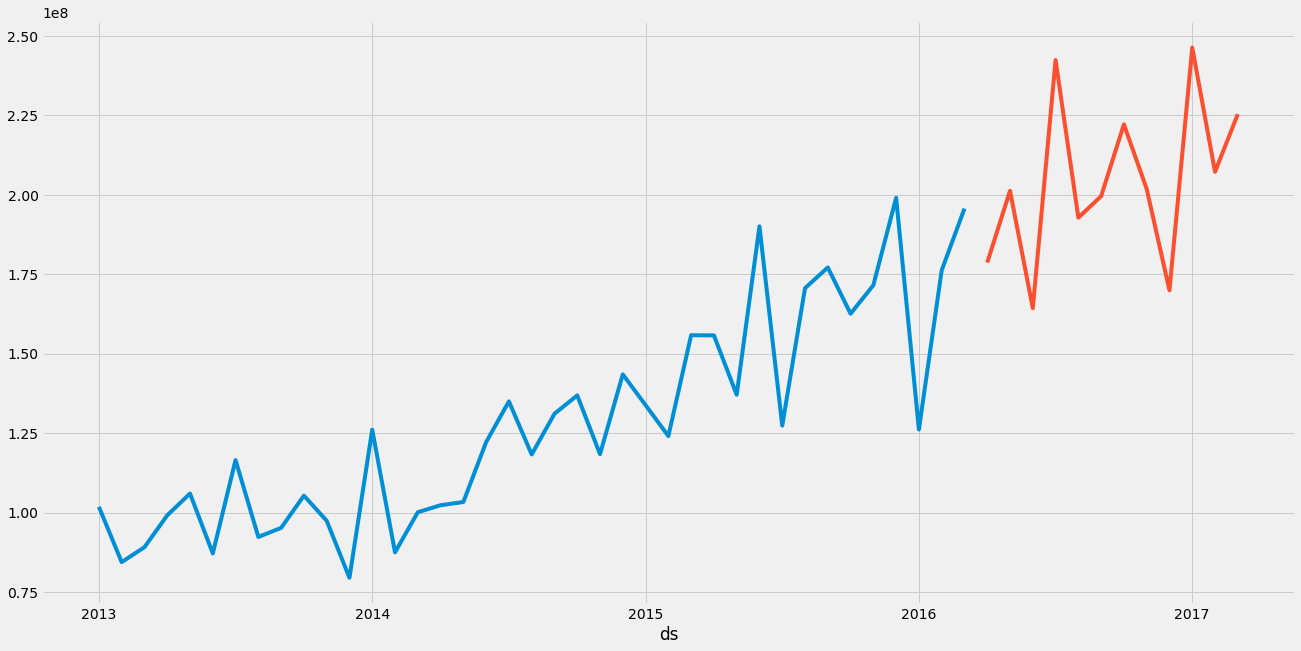

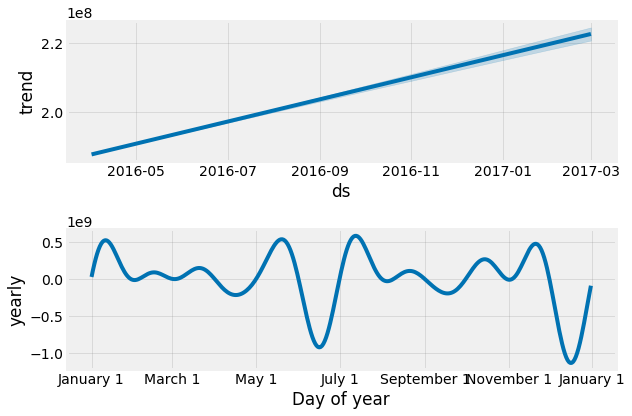

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  2    Country :  Columbia


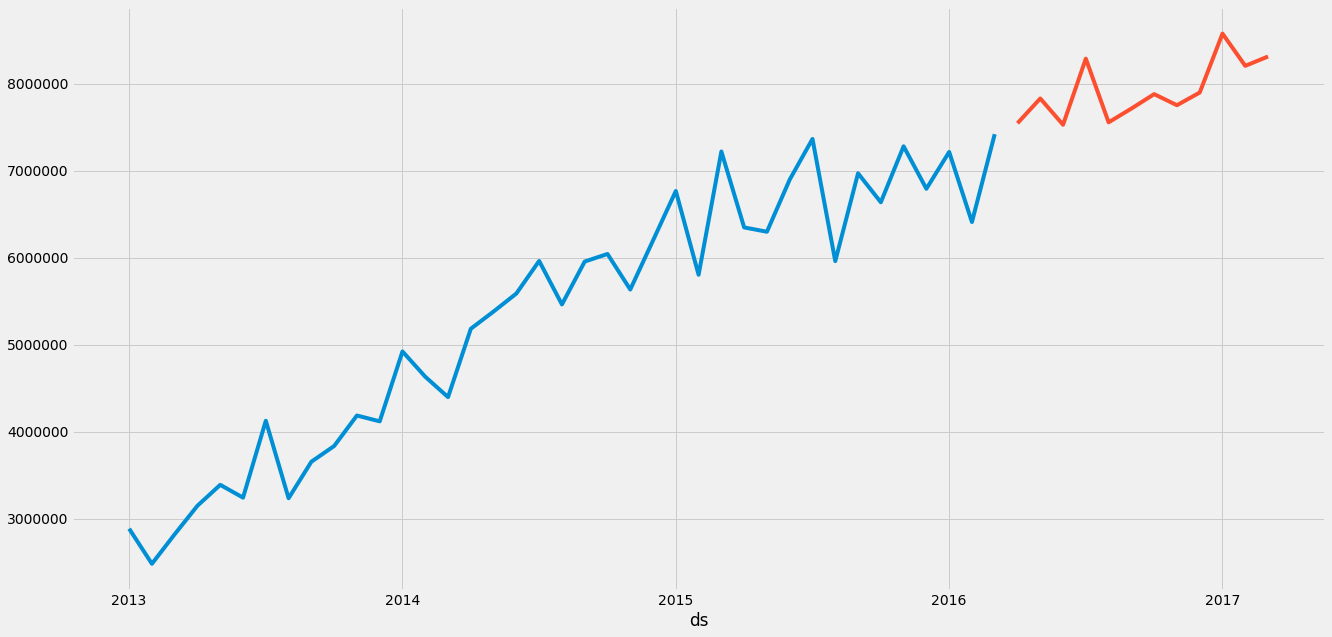

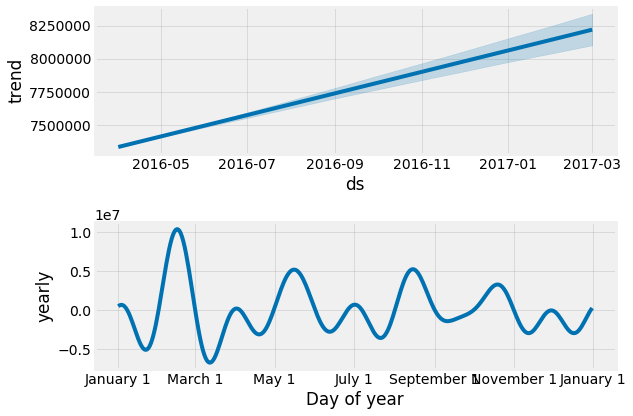

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


Product_ID :  3    Country :  Argentina


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


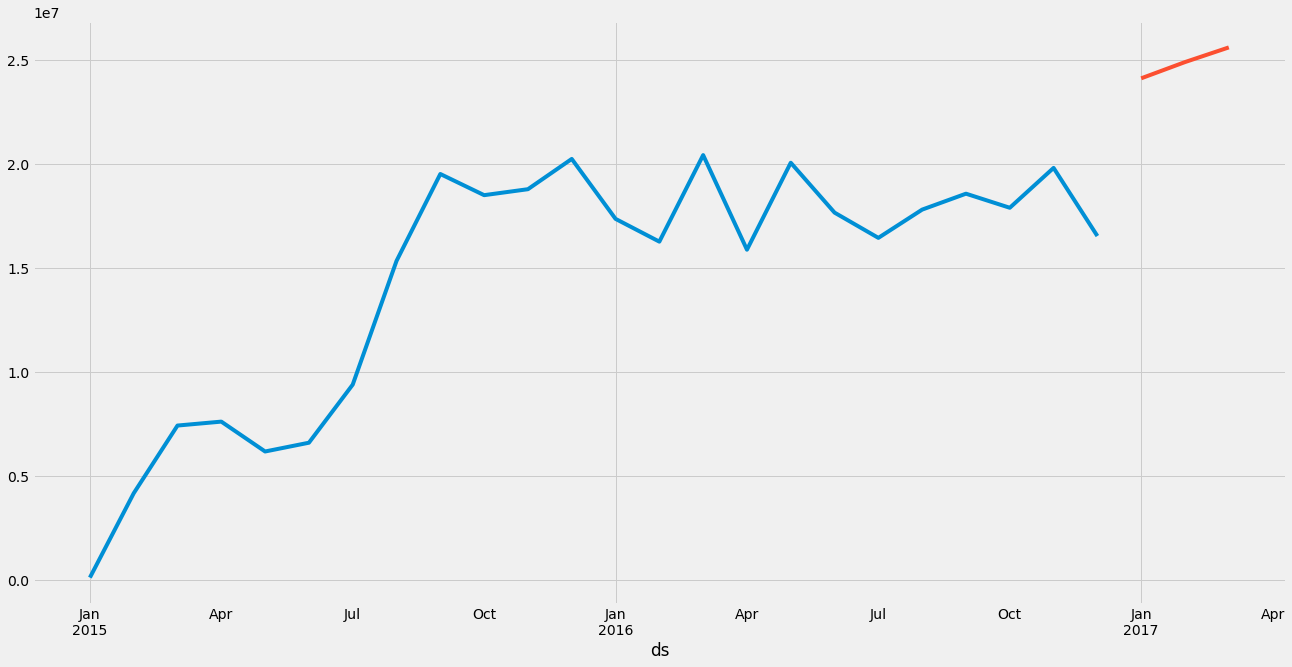

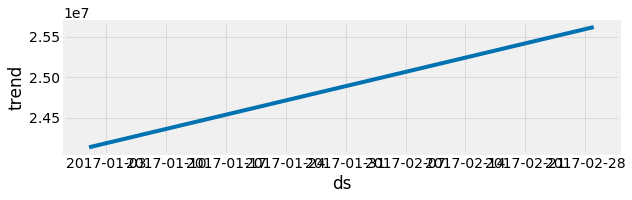

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 21.0.


Product_ID :  3    Country :  Columbia


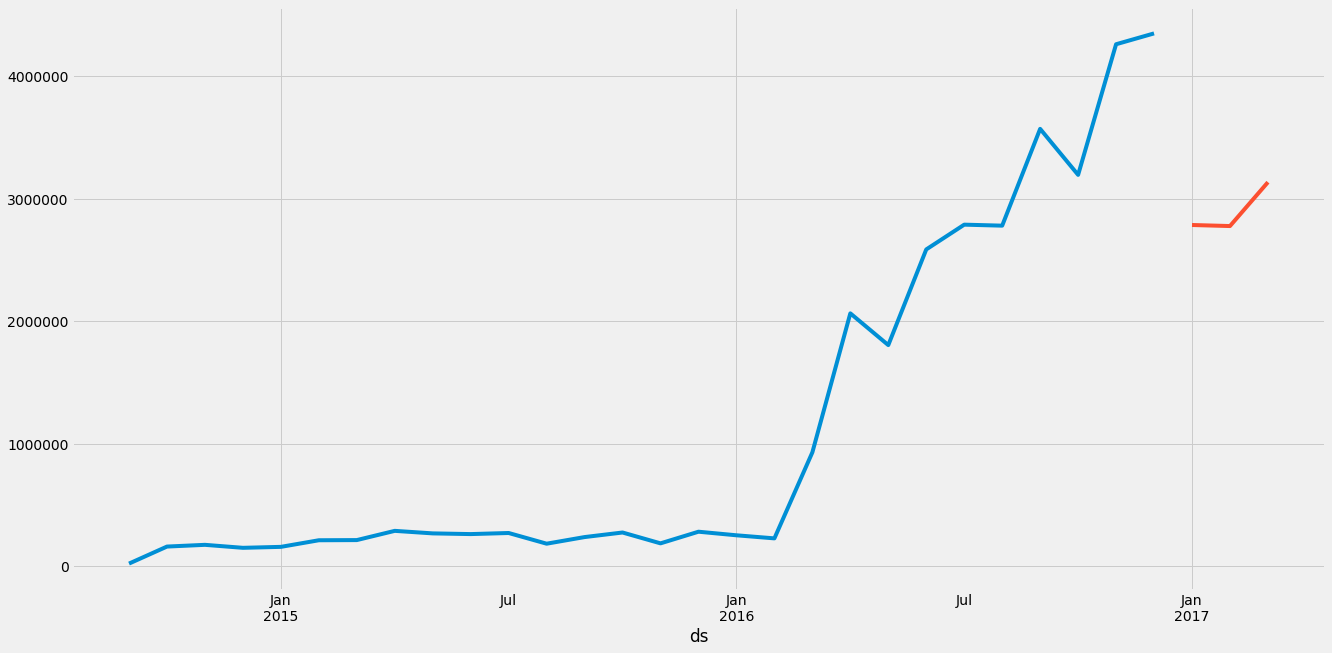

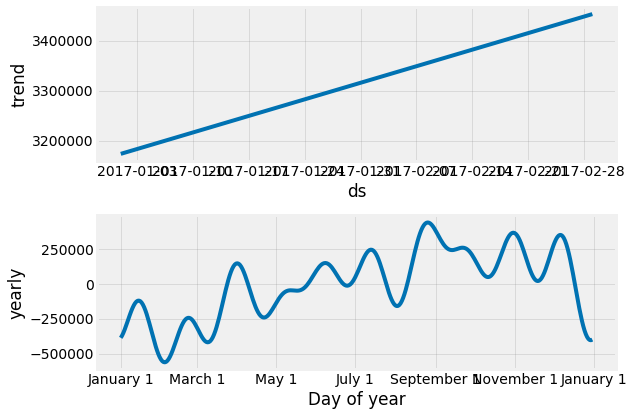

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  4    Country :  England


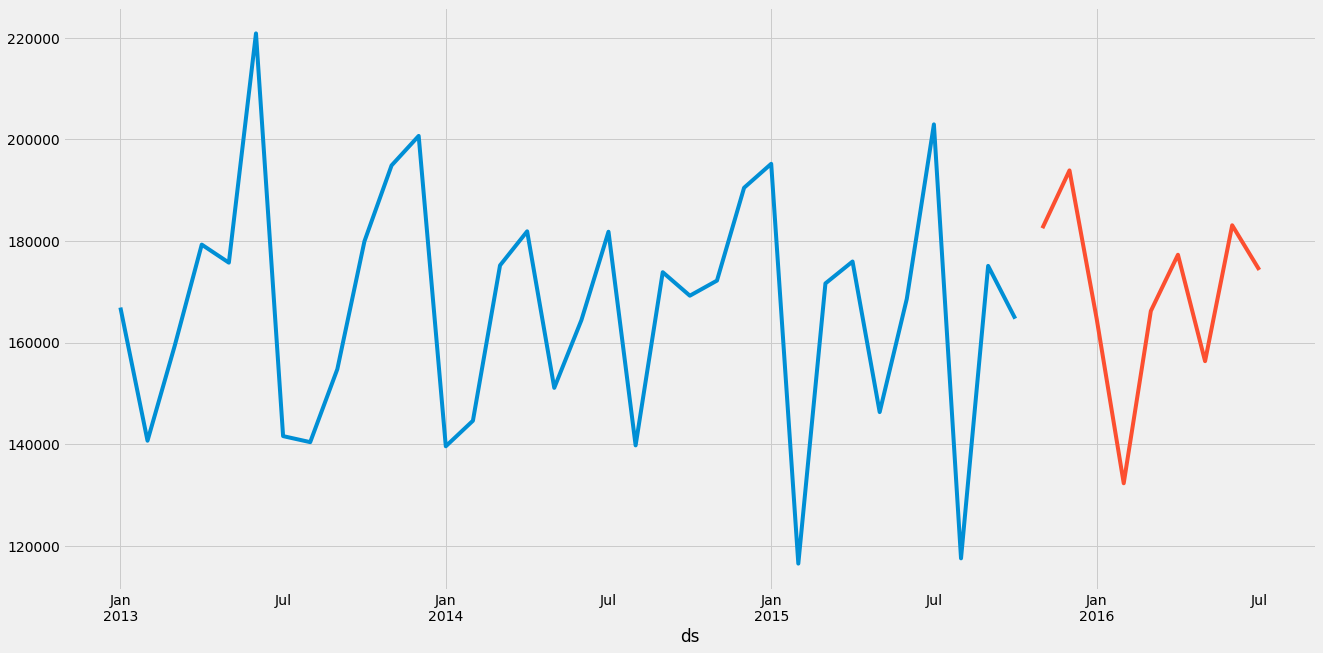

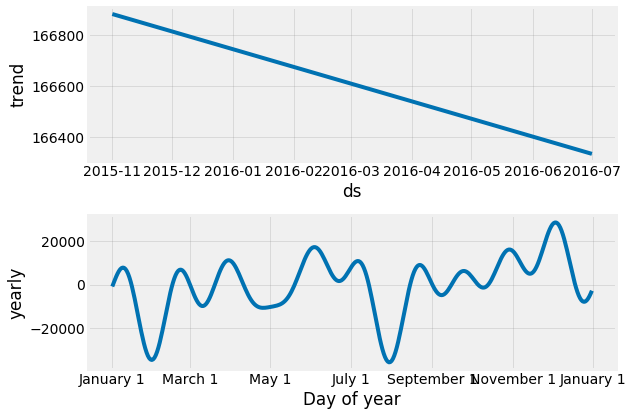

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  4    Country :  Finland


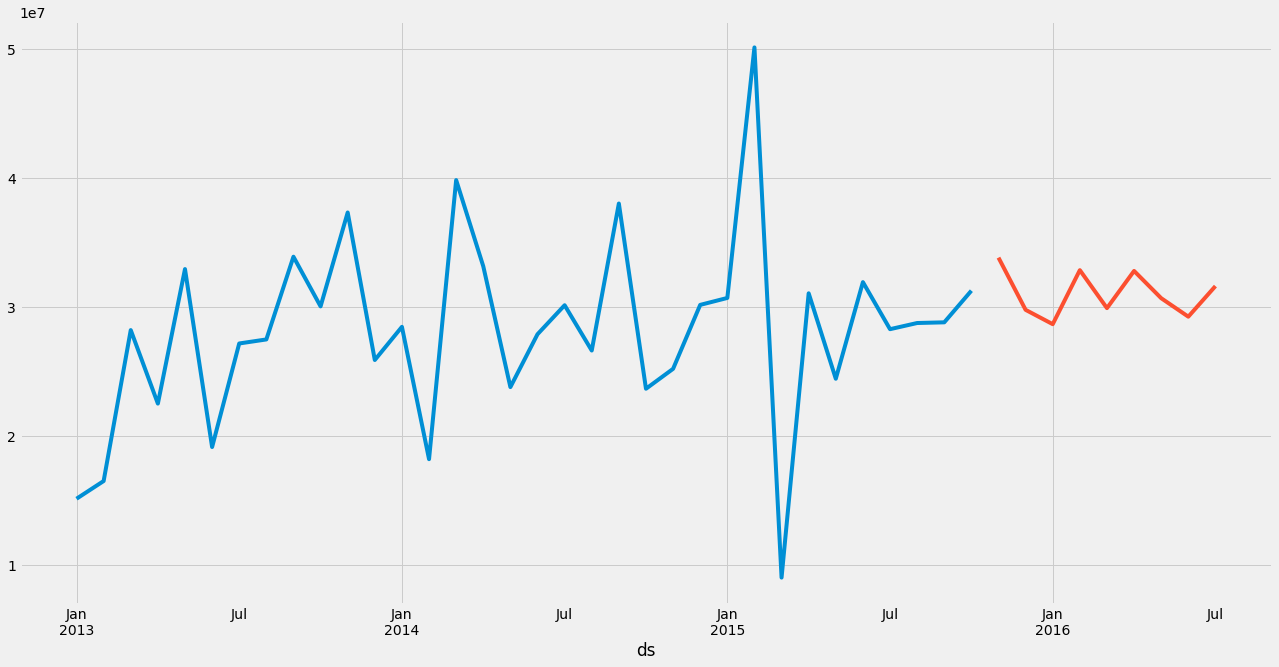

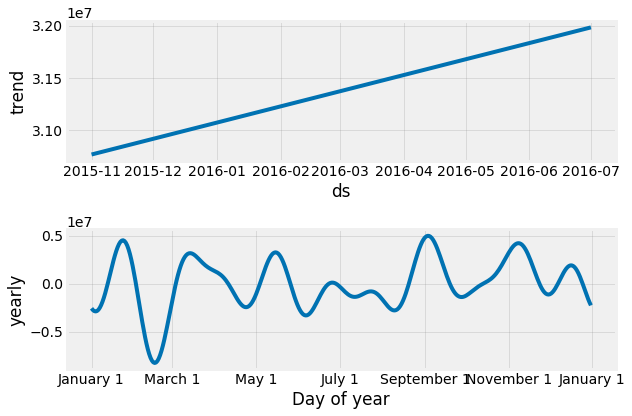

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Product_ID :  5    Country :  England


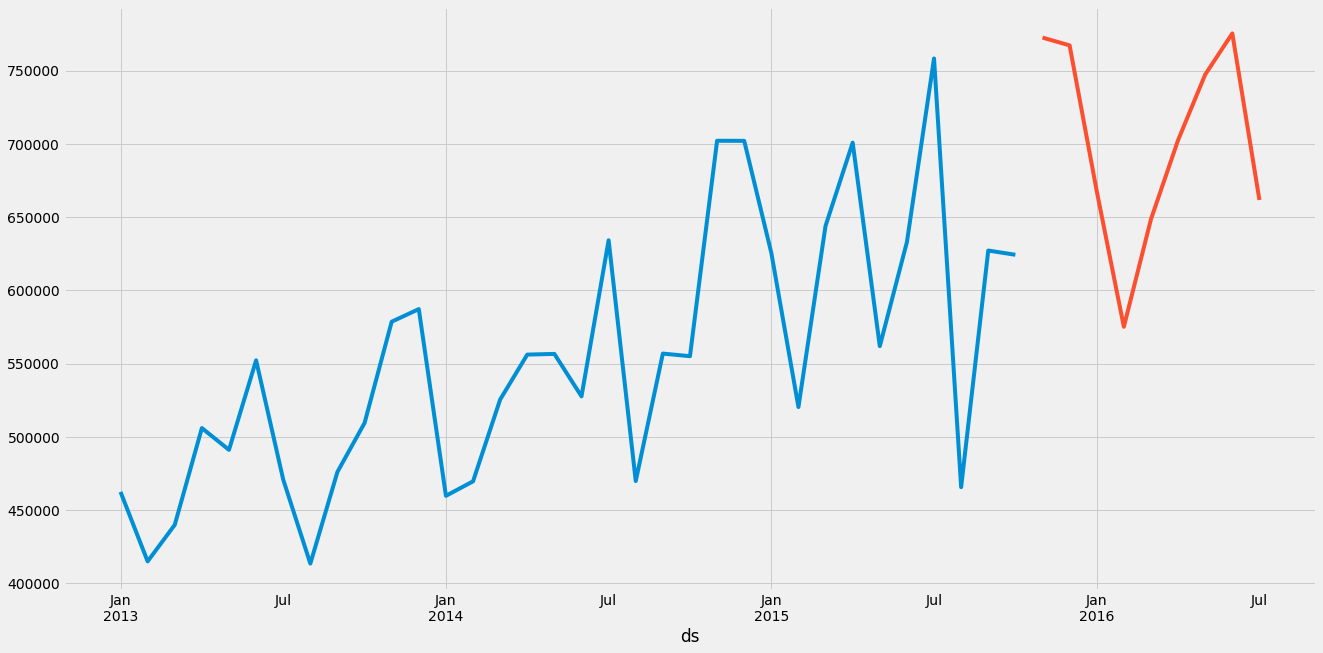

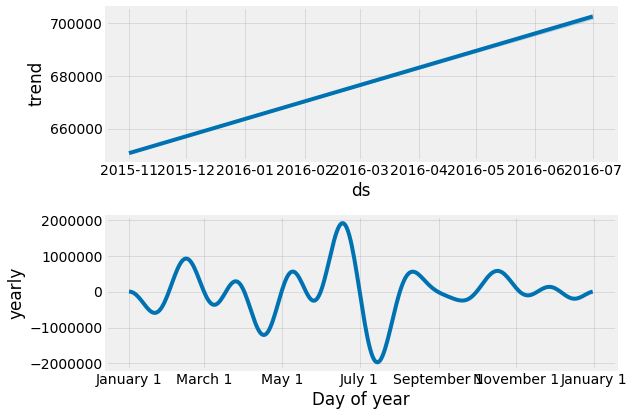

In [412]:
for i in range(1,len(set(train_visual['Product_ID']))+1):
    tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
    for j in tmp:
        print('Product_ID : ',i,'  ','Country : ',j)
        # set the uncertainty interval to 95% (the Prophet default is 80%)
        my_model = Prophet(interval_width=0.80)
        
        my_model.fit(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds'])[['ds','y']])
        
        forecast = my_model.predict(test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])[['ds','y']])
        # print(forecast.head())
        
        df = test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].merge(right=forecast[['ds','yhat']],on='ds',how='left')
        # print(test_visual.columns)
        
        train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))
        
        df.sort_values(['ds']).set_index('ds')['yhat'].plot(figsize=(20,10))
        # print(test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])['y'])
        if result.shape[0]>0:
            result = pd.concat([result,df[['S_No','yhat']]],0)
        else:
            result['S_No'] = df['S_No'].values
            result['yhat'] = df['yhat'].values
            
        plt.show()
        fig2 = my_model.plot_components(forecast)
        plt.show()
        print('=============================================================================================')

        
        

In [390]:
sub = sub.merge(right=result,on='S_No',how='left')

In [391]:
sub.drop(['Sales'],1,inplace=True)
sub.rename(columns={'yhat':'Sales'},inplace=True)
sub.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,2.608866e+07
1,79074,2016,5,1,Argentina,2.620452e+07
2,79075,2016,6,1,Argentina,2.638413e+07
3,79076,2016,7,1,Argentina,2.552274e+07
4,79077,2016,8,1,Argentina,2.266080e+07


In [392]:
# sub['Sales'] = np.power(sub['Sales'].values,10)-1
train_visual[(train_visual['Product_ID']==1)&(train_visual['Country']=='Argentina')].tail()

,Year,Month,Product_ID,Country,y,ds
330,2015,11,1,Argentina,14762475.0,2015-11-01
338,2015,12,1,Argentina,15003450.0,2015-12-01
346,2016,1,1,Argentina,14740425.0,2016-01-01
354,2016,2,1,Argentina,11214000.0,2016-02-01
362,2016,3,1,Argentina,15016050.0,2016-03-01


In [393]:
sub[(sub['Product_ID']==1)&(sub['Country']=='Argentina')].head(10)

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,2.608866e+07
1,79074,2016,5,1,Argentina,2.620452e+07
2,79075,2016,6,1,Argentina,2.638413e+07
3,79076,2016,7,1,Argentina,2.552274e+07
4,79077,2016,8,1,Argentina,2.266080e+07
5,79078,2016,9,1,Argentina,2.399056e+07
6,79079,2016,10,1,Argentina,2.384810e+07
7,79080,2016,11,1,Argentina,2.342596e+07
8,79081,2016,12,1,Argentina,2.076479e+07
9,79082,2017,1,1,Argentina,2.127891e+07


In [394]:
train_visual[(train_visual['Product_ID']==1)&(train_visual['Country']=='Columbia')].tail()

,Year,Month,Product_ID,Country,y,ds
331,2015,11,1,Columbia,3634705.10,2015-11-01
339,2015,12,1,Columbia,3569022.15,2015-12-01
347,2016,1,1,Columbia,3313485.60,2016-01-01
355,2016,2,1,Columbia,3617369.09,2016-02-01
363,2016,3,1,Columbia,2928867.34,2016-03-01


In [395]:
# set(sub['Country'][sub['Product_ID']==1])  Columbia
sub[(sub['Product_ID']==1)&(sub['Country']=='Columbia')].head(10)

,S_No,Year,Month,Product_ID,Country,Sales
39,79112,2016,4,1,Columbia,4.000600e+06
40,79113,2016,5,1,Columbia,4.417417e+06
41,79114,2016,6,1,Columbia,3.719612e+06
42,79115,2016,7,1,Columbia,4.019552e+06
43,79116,2016,8,1,Columbia,2.607090e+06
44,79117,2016,9,1,Columbia,3.103263e+06
45,79118,2016,10,1,Columbia,3.481384e+06
46,79119,2016,11,1,Columbia,3.277092e+06
47,79120,2016,12,1,Columbia,3.350358e+06
48,79121,2017,1,1,Columbia,3.500675e+06


In [396]:
sub['Sales'] = np.round(sub['Sales'],2)

In [397]:
sub.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,26088663.60
1,79074,2016,5,1,Argentina,26204524.42
2,79075,2016,6,1,Argentina,26384125.88
3,79076,2016,7,1,Argentina,25522742.06
4,79077,2016,8,1,Argentina,22660798.42


In [365]:
sub.to_csv('pf_multiplicative.csv',index=False)

<h1>Visualizing Predictions</h1>

In [195]:
def visualize_test_prediction(y_pred):
    train_visual = pd.read_csv('Data/train_visual.csv')
    test_visual = pd.read_csv('Data/test_visual.csv')
    test_visual['Sales'] = y_pred
    
    train_visual['Year'] = train_visual['Year'].apply(lambda x : str(x))
    train_visual['Month'] = train_visual['Month'].apply(lambda x : str(x))

    test_visual['Year'] = test_visual['Year'].apply(lambda x : str(x))
    test_visual['Month'] = test_visual['Month'].apply(lambda x : str(x))
    
    train_visual['date'] = pd.to_datetime(train_visual['Year']+'-'+train_visual['Month']+'-'+str(1))
    test_visual['date'] = pd.to_datetime(test_visual['Year']+'-'+test_visual['Month']+'-'+str(1))

    train_visual.set_index('date',inplace=True)
    test_visual.set_index('date',inplace=True)
    for i in range(1,len(set(train_visual['Product_ID']))+1):
        tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
        for j in tmp:
            print('Product ',i,' in ',j)
            train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
            test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
            plt.show()

In [115]:
# train_visual = pd.read_csv('Data/train_visual.csv')
# test_visual = pd.read_csv('Data/test_visual.csv')
# test_visual['Sales'] = 0

# train_visual['Year'] = train_visual['Year'].apply(lambda x : str(x))
# train_visual['Month'] = train_visual['Month'].apply(lambda x : str(x))

# test_visual['Year'] = test_visual['Year'].apply(lambda x : str(x))
# test_visual['Month'] = test_visual['Month'].apply(lambda x : str(x))

# train_visual['date'] = pd.to_datetime(train_visual['Year']+'-'+train_visual['Month']+'-'+str(1))
# test_visual['date'] = pd.to_datetime(test_visual['Year']+'-'+test_visual['Month']+'-'+str(1))

# train_visual.set_index('date',inplace=True)
# test_visual.set_index('date',inplace=True)


# for i in range(1,len(set(train_visual['Product_ID']))+1):
#     tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
#     for j in tmp:
#         plt.figure(figsize=(20,10))
#         autocorrelation_plot(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].values)
#         plt.show()


In [116]:
# for i in range(1,len(set(train_visual['Product_ID']))+1):
#     tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
#     for j in tmp:
#         print('Product ',i,' in ',j)
#         model = ARIMA(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].values, order=(1, 1, 0))  
#         test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['Year','Month'])['Sales'] = model.fit(disp=-1)  

#         train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
#         test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
#         plt.show()